In [1]:
!pip uninstall basicpy -y
!pip install -e ../

Found existing installation: BaSiCPy 1.1.0
Uninstalling BaSiCPy-1.1.0:
  Successfully uninstalled BaSiCPy-1.1.0
Obtaining file:///Users/fukai/projects/BaSiCpy
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for BaSiCPy (pyproject.toml) ... done
  Created wheel for BaSiCPy: filename=BaSiCPy-1.1.0-0.editable-py3-none-any.whl size=6231 sha256=48e9c5fd63c46be30b3b2075946a963e8222846242904c256b8833a8fd127c4c
  Stored in directory: /private/var/folders/81/kh0zpmbd00g39vwz69lkk4mc0000gn/T/pip-ephem-wheel-cache-82ouehiv/wheels/27/16/b1/2692f2d02db04ffefd7af1091113f0ef52a00fd39f93544489
Successfully built BaSiCPy


In [2]:
!pip install pandas

In [8]:
from basicpy import BaSiC
from basicpy import datasets as bdata
import numpy as np
from basicpy.tools.dct_tools import JaxDCT
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams["font.family"] = "Arial"

In [4]:
basic_approximates = [
    BaSiC(
        fitting_mode="approximate",
        working_size=None,
        get_darkfield=d,
        max_reweight_iterations=1,
        approx_rescale_parameters=False,
    )
    for d in [False, True]
]

basic_ladmaps = [
    BaSiC(
        fitting_mode="ladmap",
        working_size=None,
        get_darkfield=d,
        max_reweight_iterations=1,
    )
    for d in [False, True]
]

result_df = []
for data_key in bdata.RESCALED_TEST_DATA_PROPS.keys():
    data = bdata.fetch(data_key)
    for b in basic_approximates + basic_ladmaps:
        b.fit(data)
        res = (
            data
            - b.baseline[:, np.newaxis, np.newaxis] * b.flatfield[np.newaxis]
            - b.darkfield
        )
        assert np.allclose(res, b._residual, atol=100000, rtol=1e-2)
        print(
            [
                b._smoothness_flatfield,
                b._smoothness_darkfield,
                b._sparse_cost_darkfield,
            ]
        )
        lagrangians = [
            np.sum(np.abs(res)),
            b._smoothness_flatfield * np.sum(np.abs(JaxDCT.dct2d(b._S))),
            b._smoothness_darkfield * np.sum(np.abs(JaxDCT.dct2d(b._D_R))),
            b._sparse_cost_darkfield * np.sum(np.abs(b._D_R)),
        ]
        print(lagrangians)
        print(sum(lagrangians) / 1e9)
        result_df.append(
            {
                "data_key": data_key,
                "lagrangian_value": np.sum(lagrangians),
                "fitting_mode": b.fitting_mode,
                "get_darkfield": b.get_darkfield,
                "smoothness_flatfield": b._smoothness_flatfield,
                "smoothness_darkfield": b._smoothness_darkfield,
                "sparse_cost_darkfield": b._sparse_cost_darkfield,
            }
        )
result_df = pd.DataFrame.from_records(result_df)

Reweighting did not converge.


[1.0, 1.0, 0.01]
[1099034800.0, 154297.046875, 0.0, 0.0]
1.099189049046875


Reweighting did not converge.


[1.0, 1.0, 0.01]
[1757012000.0, 213185.765625, 48830.8203125, 19960.2175]
1.7572939448034375


Reweighting did not converge.


[1.0, 1.0, 0.01]
[1096814300.0, 158226.546875, 0.0, 0.0]
1.096972562546875


Reweighting did not converge.


[1.0, 1.0, 0.01]
[1091462400.0, 168791.1875, 13969.2412109375, 7975.2325]
1.091653135661211


Reweighting did not converge.


[1.0, 1.0, 0.01]
[6024838.0, 55344.93359375, 0.0, 0.0]
0.00608018293359375


Reweighting did not converge.


[1.0, 1.0, 0.01]
[5987092.5, 44996.8125, 10539.80078125, 3655.3625]
0.00604628447578125


Reweighting did not converge.


[1.0, 1.0, 0.01]
[6021647.0, 55280.609375, 0.0, 0.0]
0.006076927609375


Reweighting did not converge.


[1.0, 1.0, 0.01]
[6021646.5, 55280.59765625, 0.0, 0.0]
0.00607692709765625


Reweighting did not converge.


[1.0, 1.0, 0.01]
[10500024.0, 12645.13671875, 0.0, 0.0]
0.01051266913671875


Reweighting did not converge.


[1.0, 1.0, 0.01]
[7541635.0, 11638.2802734375, 4056.244384765625, 924.9996875]
0.0075582545243457035


Reweighting did not converge.


[1.0, 1.0, 0.01]
[10253231.0, 12016.794921875, 0.0, 0.0]
0.010265247794921875


Reweighting did not converge.


[1.0, 1.0, 0.01]
[7699621.0, 10985.5595703125, 3178.745361328125, 880.470625]
0.0077146657755566405


Reweighting did not converge.


[1.0, 1.0, 0.01]
[37719864.0, 26858.06640625, 0.0, 0.0]
0.03774672206640625


Reweighting did not converge.


[1.0, 1.0, 0.01]
[32038964.0, 18261.84375, 10042.62109375, 4815.751562500001]
0.03207208421640625


Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.


[1.0, 1.0, 0.01]
[36398190.0, 26686.458984375, 0.0, 0.0]
0.03642487845898437


Reweighting did not converge.


[1.0, 1.0, 0.01]
[28619078.0, 27228.216796875, 9909.806640625, 6001.275000000001]
0.028662217298437497


Reweighting did not converge.


[1.0, 1.0, 0.01]
[717722900.0, 496804.75, 0.0, 0.0]
0.71821968475


Reweighting did not converge.


[1.0, 1.0, 0.01]
[964966100.0, 586249.25, 99396.84375, 33049.505]
0.96568477559875


Reweighting did not converge.


[1.0, 1.0, 0.01]
[612238500.0, 554228.125, 0.0, 0.0]
0.612792756125


Reweighting did not converge.


[1.0, 1.0, 0.01]
[535637220.0, 582852.9375, 107348.328125, 31567.690000000002]
0.536358984955625


In [6]:
result_df["label"] = (
    result_df["fitting_mode"]
    + " "
    + result_df["get_darkfield"].apply(lambda x: "with " if x else "without ")
    + "darkfield "
)
result_df = result_df.sort_values(["data_key", "get_darkfield"])
result_df

,data_key,lagrangian_value,fitting_mode,get_darkfield,smoothness_flatfield,smoothness_darkfield,sparse_cost_darkfield,label
0,cell_culture,1.099189e+09,FittingMode.approximate,False,1.0,1.0,0.01,approximate without darkfield
2,cell_culture,1.096973e+09,FittingMode.ladmap,False,1.0,1.0,0.01,ladmap without darkfield
1,cell_culture,1.757294e+09,FittingMode.approximate,True,1.0,1.0,0.01,approximate with darkfield
3,cell_culture,1.091653e+09,FittingMode.ladmap,True,1.0,1.0,0.01,ladmap with darkfield
4,timelapse_brightfield,6.080183e+06,FittingMode.approximate,False,1.0,1.0,0.01,approximate without darkfield
6,timelapse_brightfield,6.076928e+06,FittingMode.ladmap,False,1.0,1.0,0.01,ladmap without darkfield
5,timelapse_brightfield,6.046284e+06,FittingMode.approximate,True,1.0,1.0,0.01,approximate with darkfield
7,timelapse_brightfield,6.076927e+06,FittingMode.ladmap,True,1.0,1.0,0.01,ladmap with darkfield
8,timelapse_nanog,1.051267e+07,FittingMode.approximate,False,1.0,1.0,0.01,approximate without darkfield
10,timelapse_nanog,1.026525e+07,FittingMode.ladmap,False,1.0,1.0,0.01,ladmap without darkfield


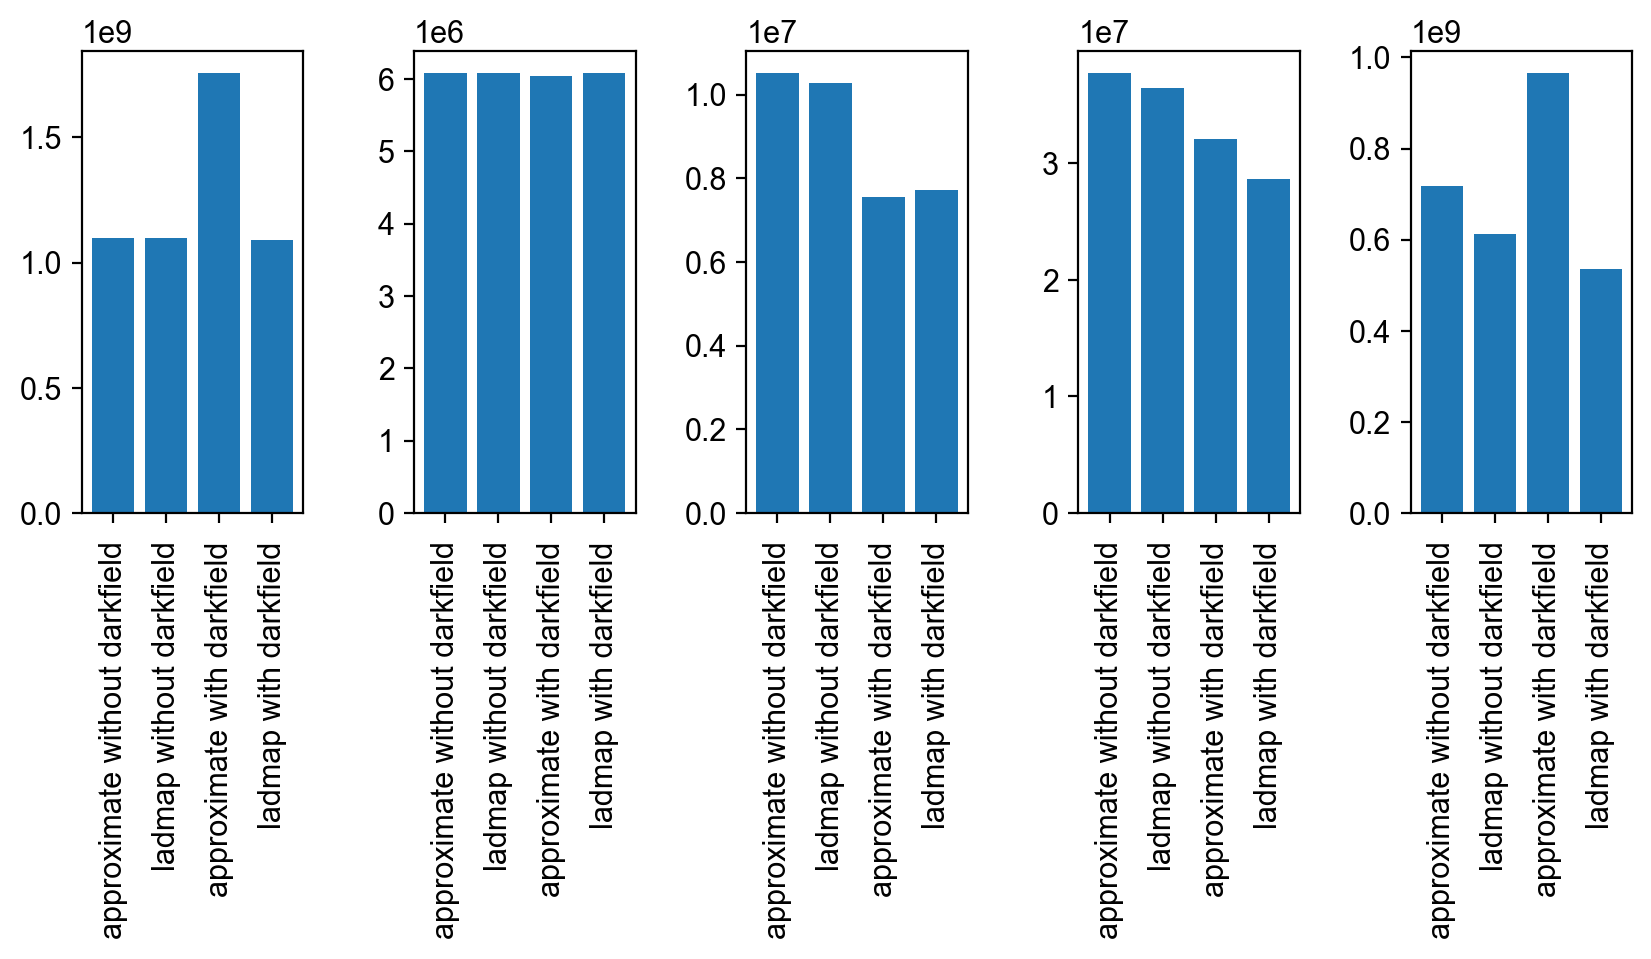

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3), gridspec_kw=dict(wspace=0.5))
for ax, (image_key, grp) in zip(axes, result_df.groupby("data_key")):
    ax.bar(
        grp["label"],
        grp["lagrangian_value"],
    )
    ax.xaxis.set_tick_params(rotation=90)

In [10]:
summarized_df = []
for (image_key, get_darkfield), grp in result_df.groupby(["data_key", "get_darkfield"]):
    row_a = grp[grp["fitting_mode"] == "approximate"]
    row_l = grp[grp["fitting_mode"] == "ladmap"]
    summarized_df.append(
        {
            "data_key": image_key,
            "get_darkfield": get_darkfield,
            "ratio": row_l["lagrangian_value"].values[0]
            / row_a["lagrangian_value"].values[0],
        }
    )
summarized_df = pd.DataFrame.from_records(summarized_df)

In [11]:
summarized_df

,data_key,get_darkfield,ratio
0,cell_culture,False,0.997984
1,cell_culture,True,0.621213
2,timelapse_brightfield,False,0.999465
3,timelapse_brightfield,True,1.005068
4,timelapse_nanog,False,0.976464
5,timelapse_nanog,True,1.020694
6,timelapse_pu1,False,0.964981
7,timelapse_pu1,True,0.893681
8,wsi_brain,False,0.853211
9,wsi_brain,True,0.555418


In [12]:
grp

,data_key,lagrangian_value,fitting_mode,get_darkfield,smoothness_flatfield,smoothness_darkfield,sparse_cost_darkfield,label
17,wsi_brain,9.656848e+08,FittingMode.approximate,True,1.0,1.0,0.01,approximate with darkfield
19,wsi_brain,5.363590e+08,FittingMode.ladmap,True,1.0,1.0,0.01,ladmap with darkfield


0    False
2    False
4    False
6    False
8    False
Name: ratio, dtype: bool
0    True
2    True
4    True
6    True
8    True
Name: ratio, dtype: bool
1    False
3     True
5     True
7    False
9    False
Name: ratio, dtype: bool
1     True
3    False
5    False
7     True
9     True
Name: ratio, dtype: bool


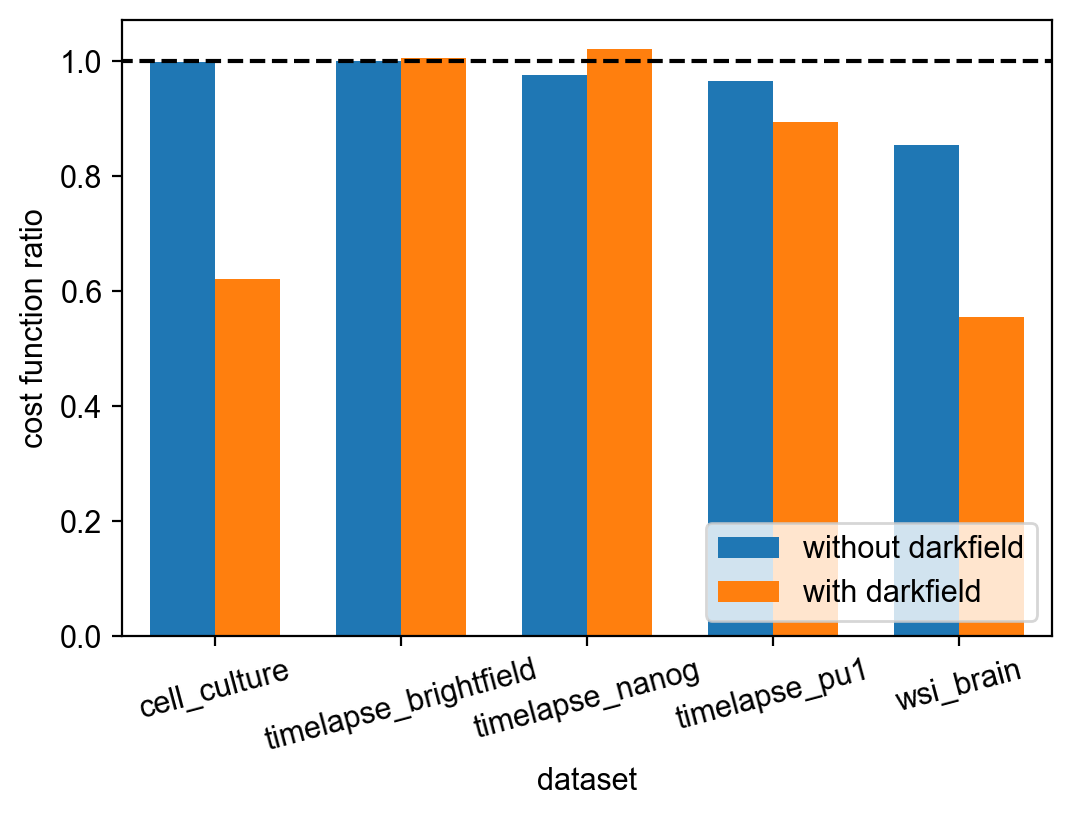

In [18]:
width = 0.35
for get_darkfield, grp in summarized_df.groupby("get_darkfield"):
    xs = np.arange(len(grp)) + (width / 2 * (get_darkfield - 0.5) * 2)
    plt.bar(
        xs,
        grp["ratio"],
        width,
        label=("with " if get_darkfield else "without ") + "darkfield",
    )
    print(grp["ratio"] > 1)
    print(grp["ratio"] < 1)
    if get_darkfield:
        plt.xticks(np.arange(len(grp)), grp["data_key"], rotation=15, ha="center")
plt.hlines(1.0, -1, 5, ls="--", color="k")
plt.ylabel("cost function ratio")
plt.xlim(-0.5, 4.5)
plt.legend(loc="lower right")
plt.xlabel("dataset")
plt.savefig("figs/figS_cost_function_ratio.pdf")